### Final data preprocessing (Step 14)
#### Author: S. Sakib Hasan

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split

In [2]:
os.chdir(os.path.join(os.getcwd(), "..", "..", "data"));

In [3]:
df = pd.read_csv("combined-season-data.csv", index_col=False);

In [4]:
df.head()

,season,GW,at_home,player_id,team_id,opponent_id,champion_ls,top5_ls,bottom5_ls,promoted_ts,...,threat_rlf,threat_rsf,total_points_pgw,total_points_rlf,total_points_rsf,yellow_cards,yellow_cards_pgw,yellow_cards_rlf,yellow_cards_rsf,total_points
0,2016,1,0,1,20,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0
1,2016,1,1,2,6,17,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1
2,2016,1,1,4,1,9,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,2
3,2016,1,0,6,18,13,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0
4,2016,1,1,7,4,20,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,73340.0,2017.121612,0.948649,2016.00000,2016.00,2017.000000,2018.000000,2019.000000
GW,73340.0,19.175020,11.335132,1.00000,9.00,19.000000,29.000000,38.000000
at_home,73340.0,0.499986,0.500003,0.00000,0.00,0.000000,1.000000,1.000000
player_id,73340.0,493.626561,300.685864,1.00000,243.00,484.000000,709.000000,1219.000000
team_id,73340.0,12.202495,7.352231,1.00000,6.00,11.000000,18.000000,29.000000
opponent_id,73340.0,12.103109,7.348870,1.00000,5.00,11.000000,18.000000,29.000000
champion_ls,73340.0,0.050123,0.218200,0.00000,0.00,0.000000,0.000000,1.000000
top5_ls,73340.0,0.250300,0.433189,0.00000,0.00,0.000000,1.000000,1.000000
bottom5_ls,73340.0,0.249468,0.432708,0.00000,0.00,0.000000,0.000000,1.000000
promoted_ts,73340.0,0.149700,0.356780,0.00000,0.00,0.000000,0.000000,1.000000


In [6]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'team_id', 'opponent_id',
       'champion_ls', 'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists',
       'assists_pgw', 'assists_rlf', 'assists_rsf', 'bonus', 'bonus_pgw',
       'bonus_rlf', 'bonus_rsf', 'bps', 'bps_pgw', 'bps_rlf', 'bps_rsf',
       'clean_sheets', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded', 'goals_conceded_pgw',
       'goals_conceded_rlf', 'goals_conceded_rsf', 'goals_scored',
       'goals_scored_pgw', 'goals_scored_rlf', 'goals_scored_rsf', 'ict_index',
       'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf', 'influence',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes',
       'minutes_pgw', 'minutes_rlf', 'minutes_rsf', 'opponent_form',
       'own_goals', 'own_goals_pgw', 'own_goals_rlf', 'own_goals_rsf',
       'penalties_missed', 'penalties_missed_pgw', 'penalties_missed_rlf',


In [7]:
df.dtypes

season                   int64
GW                       int64
at_home                  int64
player_id                int64
team_id                  int64
opponent_id              int64
champion_ls              int64
top5_ls                  int64
bottom5_ls               int64
promoted_ts              int64
assists                  int64
assists_pgw            float64
assists_rlf              int64
assists_rsf              int64
bonus                    int64
bonus_pgw              float64
bonus_rlf                int64
bonus_rsf                int64
bps                      int64
bps_pgw                float64
bps_rlf                  int64
bps_rsf                  int64
clean_sheets             int64
clean_sheets_pgw       float64
clean_sheets_rlf         int64
clean_sheets_rsf         int64
creativity             float64
creativity_pgw         float64
creativity_rlf         float64
creativity_rsf         float64
                        ...   
penalties_saved          int64
penaltie

In [8]:
df.isnull().sum()

season                 0
GW                     0
at_home                0
player_id              0
team_id                0
opponent_id            0
champion_ls            0
top5_ls                0
bottom5_ls             0
promoted_ts            0
assists                0
assists_pgw            0
assists_rlf            0
assists_rsf            0
bonus                  0
bonus_pgw              0
bonus_rlf              0
bonus_rsf              0
bps                    0
bps_pgw                0
bps_rlf                0
bps_rsf                0
clean_sheets           0
clean_sheets_pgw       0
clean_sheets_rlf       0
clean_sheets_rsf       0
creativity             0
creativity_pgw         0
creativity_rlf         0
creativity_rsf         0
                      ..
penalties_saved        0
penalties_saved_pgw    0
penalties_saved_rlf    0
penalties_saved_rsf    0
player_form            0
red_cards              0
red_cards_pgw          0
red_cards_rlf          0
red_cards_rsf          0


In [9]:
df.duplicated().sum()

0

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

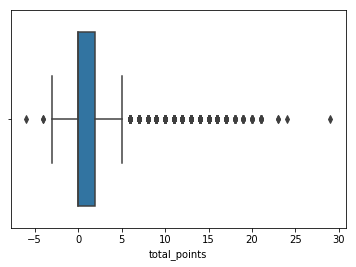

In [11]:
sns.boxplot(x=df['total_points'])

(array([1.9000e+01, 4.1138e+04, 2.4161e+04, 4.9690e+03, 2.2470e+03,
        5.3600e+02, 2.3400e+02, 3.2000e+01, 3.0000e+00, 1.0000e+00]),
 array([-6. , -2.5,  1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <a list of 10 Patch objects>)

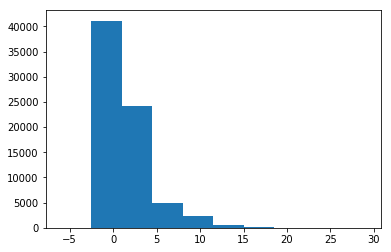

In [12]:
plt.hist(df["total_points"])

In [13]:
distribution_df = pd.DataFrame();

In [14]:
distribution_df["points"] = np.unique(df["total_points"])

In [15]:
def countPoints(point):
    return df[df["total_points"] == point].shape[0]

In [16]:
distribution_df["data_count"] = distribution_df["points"].apply(lambda point: countPoints(point))

In [17]:
distribution_df["data_percent"] = distribution_df["data_count"].apply(lambda count: round(count / df.shape[0] * 100, 3))

In [18]:
distribution_df

,points,data_count,data_percent
0,-6,1,0.001
1,-4,2,0.003
2,-3,16,0.022
3,-2,93,0.127
4,-1,252,0.344
5,0,40793,55.622
6,1,11163,15.221
7,2,9732,13.270
8,3,2666,3.635
9,4,600,0.818


In [19]:
outlier_threshold = 500;

In [20]:
outlier_points = list(distribution_df[distribution_df["data_count"] <= outlier_threshold]["points"])

In [21]:
outlier_points

[-6,
 -4,
 -3,
 -2,
 -1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 29]

In [22]:
# for outlier_point in outlier_points:
#     instances = df[df["total_points"] == outlier_point];
    
#     for index, row in instances.iterrows():
#         player_id = row["player_id"];
#         opponent_id = row["opponent_id"];
        
#         check_df = df[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id)]
#         if (check_df.shape[0] == 1):
#             df = df.drop(df[df["total_points"] == outlier_point].index);
#             df.reset_index(inplace=True, drop=True);
#         else:
#             average_score = np.mean(check_df["total_points"])
#             df.loc[(df["player_id"] == player_id) & (df["opponent_id"] == opponent_id) & 
#                    (df["total_points"] == outlier_point), 'total_points'] = average_score;
            
#     print("Completed outlier point {}".format(outlier_point))

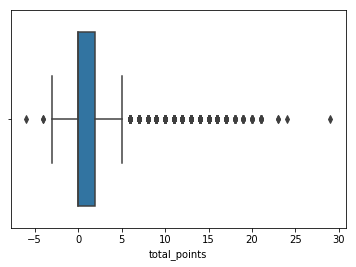

In [23]:
sns.boxplot(x=df['total_points'])

In [24]:
to_remove_cols = ["minutes", "goals_scored", "goals_conceded", "assists", "clean_sheets", "own_goals", 
                  "yellow_cards", "red_cards", "penalties_saved", "penalties_missed", "saves", "bonus", "bps",
                 "creativity", "influence", "threat", "ict_index", "result"];

In [25]:
df.drop(to_remove_cols, inplace=True, axis=1)

In [26]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'team_id', 'opponent_id',
       'champion_ls', 'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw',
       'assists_rlf', 'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf',
       'bps_pgw', 'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'r

In [27]:
df.shape

(73340, 71)

In [28]:
df.columns

Index(['season', 'GW', 'at_home', 'player_id', 'team_id', 'opponent_id',
       'champion_ls', 'top5_ls', 'bottom5_ls', 'promoted_ts', 'assists_pgw',
       'assists_rlf', 'assists_rsf', 'bonus_pgw', 'bonus_rlf', 'bonus_rsf',
       'bps_pgw', 'bps_rlf', 'bps_rsf', 'clean_sheets_pgw', 'clean_sheets_rlf',
       'clean_sheets_rsf', 'creativity_pgw', 'creativity_rlf',
       'creativity_rsf', 'goals_conceded_pgw', 'goals_conceded_rlf',
       'goals_conceded_rsf', 'goals_scored_pgw', 'goals_scored_rlf',
       'goals_scored_rsf', 'ict_index_pgw', 'ict_index_rlf', 'ict_index_rsf',
       'influence_pgw', 'influence_rlf', 'influence_rsf', 'minutes_pgw',
       'minutes_rlf', 'minutes_rsf', 'opponent_form', 'own_goals_pgw',
       'own_goals_rlf', 'own_goals_rsf', 'penalties_missed_pgw',
       'penalties_missed_rlf', 'penalties_missed_rsf', 'penalties_saved_pgw',
       'penalties_saved_rlf', 'penalties_saved_rsf', 'player_form',
       'red_cards_pgw', 'red_cards_rlf', 'red_cards_rsf', 'r

In [29]:
df.isnull().sum().sum()

0

In [30]:
df.duplicated().sum()

0

In [31]:
df.to_csv("final-preprocessed-data.csv", index=False);

In [32]:
df.drop(["season", "GW"], axis=1, inplace=True)

In [33]:
random_state = np.random.seed(24)

In [34]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60, random_state=random_state)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.50, random_state=random_state)

In [37]:
X_train.to_csv("x-train.csv", index=False);
X_test.to_csv("x-test.csv", index=False);
X_val.to_csv("x-val.csv", index=False);

In [38]:
y_train.to_csv("y-train.csv", index=False);
y_test.to_csv("y-test.csv", index=False);
y_val.to_csv("y-val.csv", index=False);